In [36]:
import pandas as pd

In [37]:
# shape, head, column types, missing values, mathematically looks like(stats,describe),
# duplicate values, variance, covariance, correlation, outliers
# Scatter, Barplot, Boxplot, Distplot, Pairplot, Heatmap, cluster map, lineplot, pivottable

In [38]:
df = pd.read_csv('D:\Python Files\CO2 Emissions_Canada.csv')

In [39]:
df.shape

(7385, 12)

In [40]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [41]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [42]:
df.columns = ['Make', 'Model', 'VehicleClass', 'EngineSize', 'Cylinders',
       'Transmission', 'FuelType', 'FuelConsumption',
       'FuelConsumption_Hwy', 'FuelConsumptionComb',
       'FuelConsumptionComb_mpg', 'CO2']

In [43]:
df.isnull().sum()

Make                       0
Model                      0
VehicleClass               0
EngineSize                 0
Cylinders                  0
Transmission               0
FuelType                   0
FuelConsumption            0
FuelConsumption_Hwy        0
FuelConsumptionComb        0
FuelConsumptionComb_mpg    0
CO2                        0
dtype: int64

In [44]:
df.describe()

,EngineSize,Cylinders,FuelConsumption,FuelConsumption_Hwy,FuelConsumptionComb,FuelConsumptionComb_mpg,CO2
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [45]:
df = df.drop_duplicates()
# a = df.duplicated()
# index = df['EngineSize'].index
# index.has_duplicates
print(df.duplicated().sum())

0


In [46]:
cols = ['Make', 'Model', 'VehicleClass', 'EngineSize', 'Cylinders',
       'Transmission', 'FuelType', 'FuelConsumption',
       'FuelConsumption_Hwy', 'FuelConsumptionComb',
       'FuelConsumptionComb_mpg', 'CO2']
for col in cols:
    if df[col].dtypes != 'object':
        print(col, ':',df[col].var())
        
coeff_cols = ['EngineSize', 'Cylinders','FuelConsumption',
       'FuelConsumption_Hwy', 'FuelConsumptionComb',
       'FuelConsumptionComb_mpg', 'CO2']
# for col in coeff_cols:
#     for ccol in coeff_cols:
#         print(col,ccol,df[col].cov(ccol))
print("Covariance:")
print(df.cov() )
print("Correlation:")
print(df.corr() )

EngineSize : 1.863774651304781
Cylinders : 3.4086408776366945
FuelConsumption : 12.624280193734752
FuelConsumption_Hwy : 5.193313750616456
FuelConsumptionComb : 8.684076177701245
FuelConsumptionComb_mpg : 52.49462788098568
CO2 : 3515.354667642503
Covariance:
                         EngineSize  Cylinders  FuelConsumption  \
EngineSize                 1.863775   2.341152         4.046547   
Cylinders                  2.341152   3.408641         5.256259   
FuelConsumption            4.046547   5.256259        12.624280   
FuelConsumption_Hwy        2.385672   3.019420         7.698740   
FuelConsumptionComb        3.299511   4.249705        10.408171   
FuelConsumptionComb_mpg   -7.546632  -9.681106       -23.880335   
CO2                       69.190518  91.368995       193.547727   

                         FuelConsumption_Hwy  FuelConsumptionComb  \
EngineSize                          2.385672             3.299511   
Cylinders                           3.019420             4.249705 

In [47]:
# df1 = pd.DataFrame({'A':[1,2,3,4],'B':[-5,-4,-3,-2]})
# df1
# df1.corr()

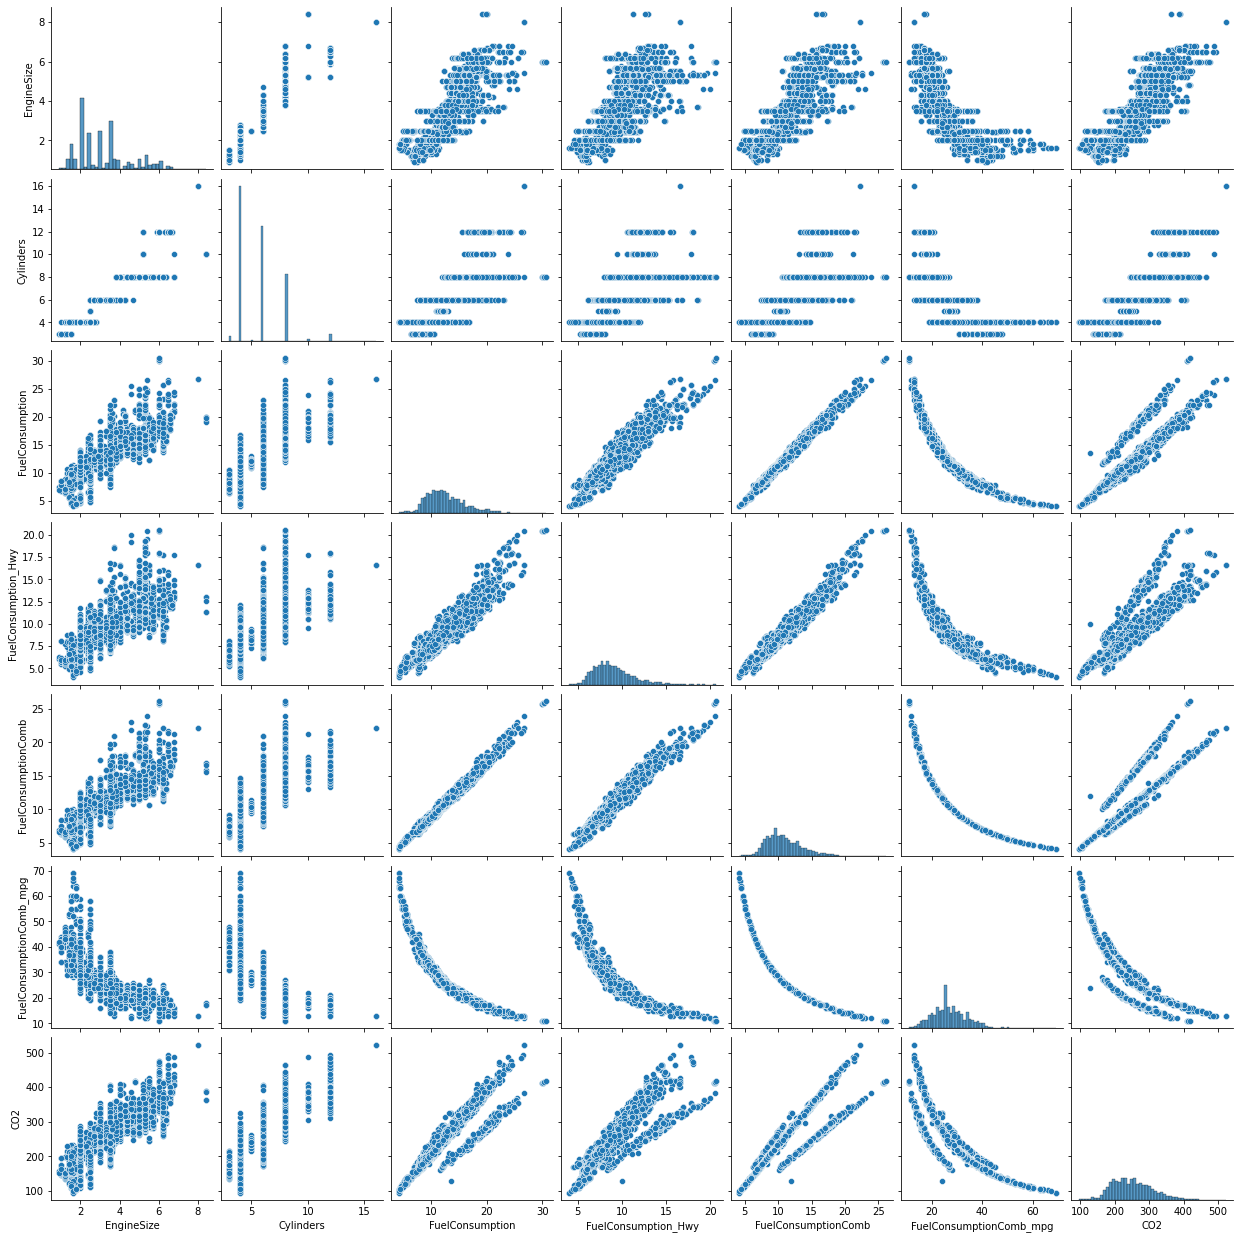

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [49]:
df.head()

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumption,FuelConsumption_Hwy,FuelConsumptionComb,FuelConsumptionComb_mpg,CO2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [108]:
# cat_cols = ['Make','Model','VehicleClass','Transmission','FuelType']
# for col in cat_cols:
#     print(df[col].value_counts())
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# df['FuelType'] = np.where(((df['FuelType'].values!='X')&(df['FuelType'].values!='Z')),'O',df['FuelType'].values)
# df['FuelType'].value_counts()
# ode = OneHotEncoder()
# ode.fit(df['FuelType'].values.reshape(-1, 1))
df['FuelType'] = df['FuelType'].map({'X': 1, 'Z': 2,'O':0})

In [109]:
df.head()

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumption,FuelConsumption_Hwy,FuelConsumptionComb,FuelConsumptionComb_mpg,CO2
0,ACURA,ILX,COMPACT,2.0,4,AS5,2,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,2,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,2,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,2,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,2,12.1,8.7,10.6,27,244


In [110]:
X = df.drop(['Make','Model','VehicleClass','Transmission','CO2'],axis=1)
X.shape
y = df['CO2']


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4397, 7), (1885, 7), (4397,), (1885,))

In [113]:
lr  = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


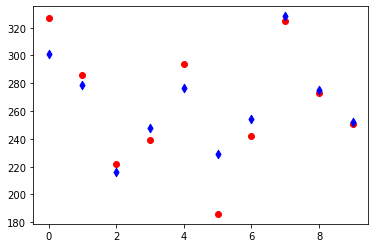

In [114]:
plt.scatter(range(len(y_test[:10])),y_test[:10],marker = 'o',color='r')
plt.scatter(range(len(y_test[:10])),y_pred[:10],marker = 'd',color='b')

In [115]:
sc = lr.score(X_test,y_test)
sc

0.9058853242276833

In [116]:
lr.coef_

array([ 6.32281157,  4.78216025, 10.7337846 ,  2.41417863,  6.80118653,
       -0.15091681, -2.66478296])

In [117]:
lr.intercept_

172.31803405346824

In [118]:
y_pred[10]

231.08578627496914

In [119]:
y_test.iloc[10]

232

In [123]:
m1,m2,m3,m4,m5,m6,m7 = [ 6.32281157,  4.78216025, 10.7337846 ,  2.41417863,  6.80118653, -0.15091681, -2.66478296]
b = 172.31803405346824
print(X_test.iloc[10].values)
x1,x2,x3,x4,x5,x6,x7 = X_test.iloc[10].values

[ 2.5  5.   1.  11.6  8.3 10.1 28. ]


In [125]:
y = m1*x1+m2*x2+m3*x3+m4*x4+m5*x5+m6*x6+m7*x7+b
y

231.0857864744682